<a href="https://colab.research.google.com/github/ChetanGoud77/ML/blob/main/ML_EX_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.5 MB/s eta 0:00:00
Predicted Cluster: 1
Fuzzy Partition Coefficient (FPC): 0.9541305031013066


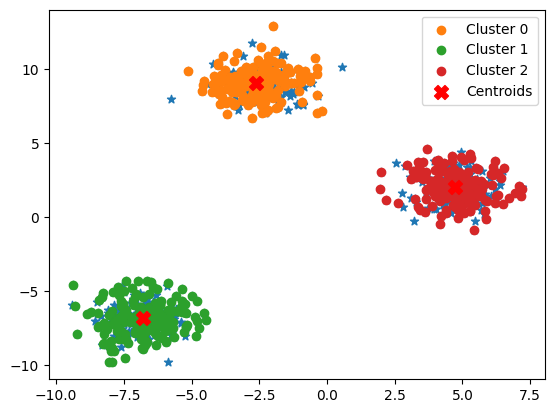

In [1]:
%pip install scikit-fuzzy
from sklearn.datasets import make_blobs
X, _ = make_blobs( n_features=2, n_samples=800, centers=3, random_state=42 )
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="*");
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=125)
import skfuzzy as fuzz
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_train.T, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None
)
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X_test.T, cntr, m=2.0, error=0.005, maxiter=1000)
predicted_cluster = u_test[:, 6].argmax()
print("Predicted Cluster:", predicted_cluster)
print("Fuzzy Partition Coefficient (FPC):", fpc)
for j in range(n_clusters):
    plt.scatter(X_train[u[j] > 0.5, 0], X_train[u[j] > 0.5, 1], label=f"Cluster {j}")
plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.legend()
plt.show()

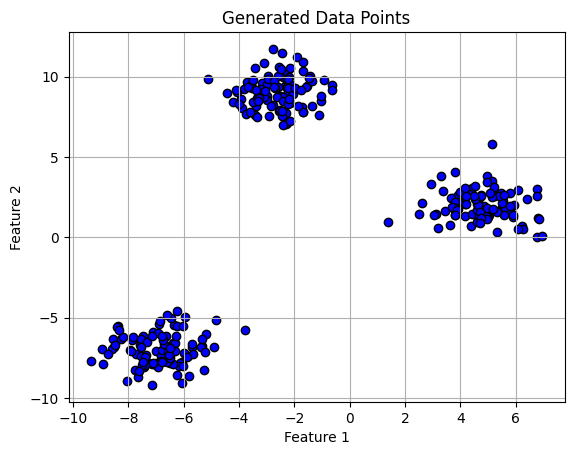

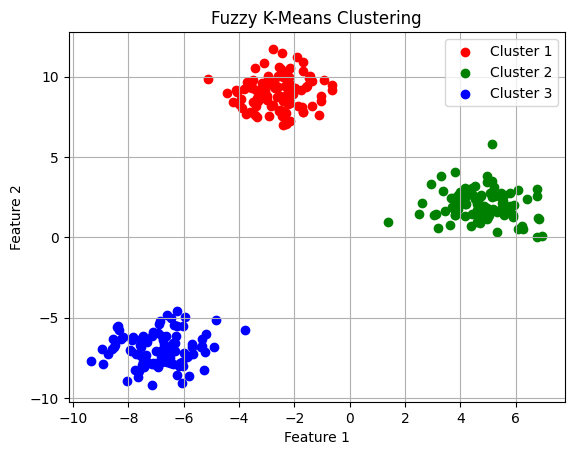

Membership values for the first data point: [0.00242913 0.00305858 0.99451229]

Fuzzy Partition Coefficient (FPC): 0.9579228967213612


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k')
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()
X_transposed = np.transpose(X)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)
cluster_membership = np.argmax(u, axis=0)
colors = ['red', 'green', 'blue']
for i in range(n_clusters):
    plt.scatter(X[cluster_membership == i, 0], X[cluster_membership == i, 1], color=colors[i], label=f"Cluster {i+1}")
plt.title("Fuzzy K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()
print("Membership values for the first data point:", u[:, 0])
print("\nFuzzy Partition Coefficient (FPC):", fpc)